# 初始尝试（作废）

In [1]:
import pandas as pd
import numpy as np

path = 'me/data/'
df = pd.read_csv(path + 'test.csv')

In [4]:
df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')
df['day'] = pd.to_datetime(df.click_time).dt.day.astype('uint8')

In [12]:
df['hour'].unique()

array([ 4,  5,  6,  9, 10, 11, 13, 14, 15], dtype=uint64)

# Pearson系数

In [1]:
# encoding:utf-8

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import time

In [3]:
path = 'me/data/'
df = pd.read_csv(path + 'test.csv')

start_time = time.time()

print("---------------源feature---------------")
print(df.head())
print()
print("---------------源feature相关性---------------")
df.corr().to_csv(path + 'corr/corr_basic.csv')
# print(df.corr())
print()

basic_list = ['ip', 'app', 'device', 'os', 'channel']
basic_df = df[basic_list]
basic_array = basic_df.as_matrix()

poly = PolynomialFeatures(2, interaction_only=True)
extended_array = poly.fit_transform(basic_array)

new_feature_name = []
# 编号为1，2，3，4，5
# 则组合顺序为：1., 1,2,3,4,5, 12,13,14,15, 23,24,25, 34,35, 45
# 索引：从6-15
for i in range(len(basic_list)):
    for j in range(i + 1, len(basic_list)):
        new_feature_name.append(basic_list[i] + '_' + basic_list[j])

new_data = []
for i in range(6, 16):
    new_data.append(extended_array[:, i])

for i in range(10):
    df[new_feature_name[i]] = new_data[i]

print("---------------组合basic feature---------------")
print(df.head())
print()
print("---------------新feature相关性---------------")
df.corr().to_csv(path + 'corr/corr_extended.csv')
# print(df.corr())

df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')
# df['day'] = pd.to_datetime(df.click_time).dt.day.astype('uint8')
# df['wday'] = pd.to_datetime(df.click_time).dt.dayofweek.astype('uint8')

print("---------------添加temporal feature---------------")
print(df.head())
print()
print("---------------新feature相关性---------------")
correlations = df.corr()
correlations.to_csv(path + 'corr/corr_temporal.csv')
# print(correlations)

print()
# print("---------------保存extended_df---------------")
# df.to_csv(path + 'test_extended')
print("--------------------")
print("Time: " + str(time.time() - start_time) + "s")

---------------源feature---------------
   click_id      ip  app  device  os  channel           click_time
0         0    5744    9       1   3      107  2017-11-10 04:00:00
1         1  119901    9       1   3      466  2017-11-10 04:00:00
2         2   72287   21       1  19      128  2017-11-10 04:00:00
3         3   78477   15       1  13      111  2017-11-10 04:00:00
4         4  123080   12       1  13      328  2017-11-10 04:00:00

---------------源feature相关性---------------


---------------组合basic feature---------------
   click_id      ip  app  device  os  channel           click_time     ip_app  \
0         0    5744    9       1   3      107  2017-11-10 04:00:00    51696.0   
1         1  119901    9       1   3      466  2017-11-10 04:00:00  1079109.0   
2         2   72287   21       1  19      128  2017-11-10 04:00:00  1518027.0   
3         3   78477   15       1  13      111  2017-11-10 04:00:00  1177155.0   
4         4  123080   12       1  13      328  2017-11-10 04:00:00  1476960.0   

   ip_device      ip_os  ip_channel  app_device  app_os  app_channel  \
0     5744.0    17232.0    614608.0         9.0    27.0        963.0   
1   119901.0   359703.0  55873866.0         9.0    27.0       4194.0   
2    72287.0  1373453.0   9252736.0        21.0   399.0       2688.0   
3    78477.0  1020201.0   8710947.0        15.0   195.0       1665.0   
4   123080.0  1600040.0  40370240.0        12.0   156.0       3936.0   

   device_os  device_channel  os_c

---------------添加temporal feature---------------
   click_id      ip  app  device  os  channel           click_time     ip_app  \
0         0    5744    9       1   3      107  2017-11-10 04:00:00    51696.0   
1         1  119901    9       1   3      466  2017-11-10 04:00:00  1079109.0   
2         2   72287   21       1  19      128  2017-11-10 04:00:00  1518027.0   
3         3   78477   15       1  13      111  2017-11-10 04:00:00  1177155.0   
4         4  123080   12       1  13      328  2017-11-10 04:00:00  1476960.0   

   ip_device      ip_os  ip_channel  app_device  app_os  app_channel  \
0     5744.0    17232.0    614608.0         9.0    27.0        963.0   
1   119901.0   359703.0  55873866.0         9.0    27.0       4194.0   
2    72287.0  1373453.0   9252736.0        21.0   399.0       2688.0   
3    78477.0  1020201.0   8710947.0        15.0   195.0       1665.0   
4   123080.0  1600040.0  40370240.0        12.0   156.0       3936.0   

   device_os  device_channel  o


--------------------
Time: 65.79459404945374s


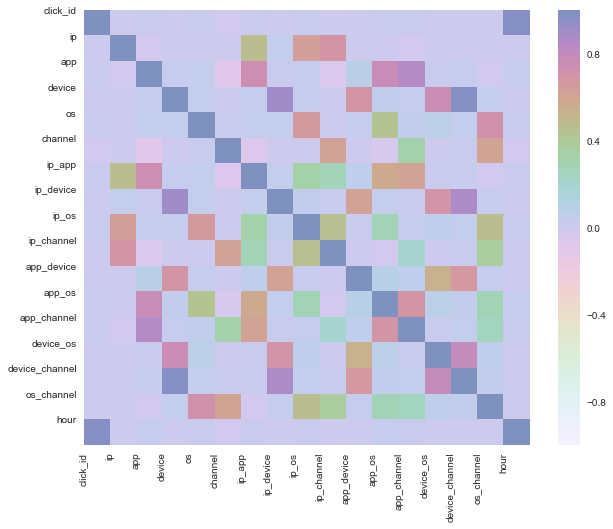

In [72]:
import seaborn as sns

names = correlations.index.tolist()
f, ax = plt.subplots(figsize = (10, 8))

# method 1
# cax = ax.matshow(correlations, vmin=-1, vmax=1)  # 绘制热力图，从-1到1
# fig.colorbar(cax)  # 将matshow生成热力图设置为颜色渐变条

# method 2
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.3, as_cmap = True)
sns.heatmap(correlations, vmax=1, vmin=-1, cmap=cmap)

ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig(path + 'corr/corr_all.png')
plt.show()

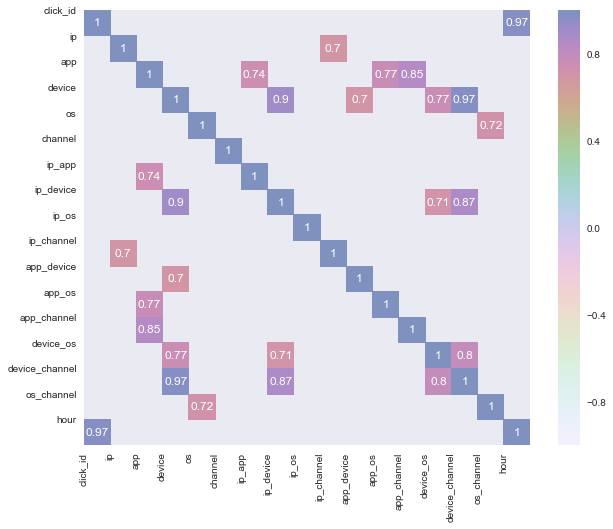

In [76]:
import seaborn as sns

names = correlations.index.tolist()
f, ax = plt.subplots(figsize = (10, 8))

# method 1
# cax = ax.matshow(correlations, vmin=-1, vmax=1)  # 绘制热力图，从-1到1
# fig.colorbar(cax)  # 将matshow生成热力图设置为颜色渐变条

# method 2
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.3, as_cmap = True)
sns.heatmap(correlations, vmax=1, vmin=-1, 
            cmap=cmap, mask=correlations<0.7, annot=True)

ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig(path + 'corr/corr_mask0.7.png')
plt.show()

# 互信息

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import time

path = 'me/data/'
df = pd.read_csv(path + 'test.csv')

start_time = time.time()

basic_list = ['ip', 'app', 'device', 'os', 'channel']
basic_df = df[basic_list]
basic_array = basic_df.as_matrix()

poly = PolynomialFeatures(2, interaction_only=True)
extended_array = poly.fit_transform(basic_array)

new_feature_name = []
# 编号为1，2，3，4，5
# 则组合顺序为：1., 1,2,3,4,5, 12,13,14,15, 23,24,25, 34,35, 45
# 索引：从6-15
for i in range(len(basic_list)):
    for j in range(i + 1, len(basic_list)):
        new_feature_name.append(basic_list[i] + '_' + basic_list[j])

new_data = []
for i in range(6, 16):
    new_data.append(extended_array[:, i])

for i in range(10):
    df[new_feature_name[i]] = new_data[i]

df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')

print()
# print("---------------保存extended_df---------------")
# df.to_csv(path + 'test_extended')
print("--------------------")
print("Time: " + str(time.time() - start_time) + "s")


--------------------
Time: 25.37750005722046s


In [4]:
names = df.columns.values.tolist()
names.remove('click_id')
names.remove('click_time')
feaures_sum = len(names)

In [14]:
import sklearn.metrics as mr

start_time = time.time()
correlations = np.zeros((feaures_sum, feaures_sum))
for i in range(feaures_sum):
    print("i = " + str(i))
    for j in range(i):
        correlations[i, j] = mr.mutual_info_score(df[names[i]], df[names[j]])
        print("\tcorr[%d,%d] = %f" % (i, j, correlations[i, j]))
        print("\tj = " + str(j) + ", Time: " + str(time.time() - start_time) + "s")

# correlations_df.to_csv(path + 'corr/mi/corr_extended.csv')
print("Time: " + str(time.time() - start_time) + "s")

i = 0
i = 1


	corr[1,0] = 0.169578
	j = 0, Time: 15.611579895019531s
i = 2


	corr[2,0] = 0.102875
	j = 0, Time: 27.487879037857056s


	corr[2,1] = 0.122814
	j = 1, Time: 34.80510091781616s
i = 3


	corr[3,0] = 0.536187
	j = 0, Time: 50.06121587753296s


	corr[3,1] = 0.113313
	j = 1, Time: 61.49131989479065s


	corr[3,2] = 0.135806
	j = 2, Time: 69.69774103164673s
i = 4


	corr[4,0] = 0.382353
	j = 0, Time: 88.67553901672363s


	corr[4,1] = 2.126626
	j = 1, Time: 103.28528785705566s


	corr[4,2] = 0.121022
	j = 2, Time: 115.617182970047s


	corr[4,3] = 0.112702
	j = 3, Time: 129.67107892036438s
i = 5


	corr[5,0] = 9.710141
	j = 0, Time: 151.67908000946045s


	corr[5,1] = 2.513700
	j = 1, Time: 170.89853191375732s


	corr[5,2] = 0.196885
	j = 2, Time: 190.62691402435303s


	corr[5,3] = 0.834439
	j = 3, Time: 213.32339000701904s


	corr[5,4] = 2.258999
	j = 4, Time: 235.6597719192505s
i = 6


	corr[6,0] = 9.855608
	j = 0, Time: 253.9639458656311s


	corr[6,1] = 0.270034
	j = 1, Time: 272.50543093681335s


	corr[6,2] = 0.328795
	j = 2, Time: 288.0643529891968s


	corr[6,3] = 0.656147
	j = 3, Time: 305.7661838531494s


	corr[6,4] = 0.484946
	j = 4, Time: 327.06664991378784s


	corr[6,5] = 9.687423
	j = 5, Time: 349.8920338153839s
i = 7


	corr[7,0] = 9.818482
	j = 0, Time: 371.43069982528687s


	corr[7,1] = 0.548177
	j = 1, Time: 394.867830991745s


	corr[7,2] = 0.221653
	j = 2, Time: 411.7579548358917s


	corr[7,3] = 2.825526
	j = 3, Time: 430.3241460323334s


	corr[7,4] = 1.122831
	j = 4, Time: 454.6418879032135s


	corr[7,5] = 9.983516
	j = 5, Time: 481.1134099960327s


	corr[7,6] = 9.854654
	j = 6, Time: 502.5602958202362s
i = 8


	corr[8,0] = 9.927253
	j = 0, Time: 528.4852049350739s


	corr[8,1] = 2.248959
	j = 1, Time: 551.0462310314178s


	corr[8,2] = 0.218964
	j = 2, Time: 570.9194688796997s


	corr[8,3] = 1.333417
	j = 3, Time: 596.8329508304596s


	corr[8,4] = 4.071520
	j = 4, Time: 620.6144578456879s


	corr[8,5] = 11.782304
	j = 5, Time: 647.9912598133087s


	corr[8,6] = 9.909227
	j = 6, Time: 673.5130310058594s


	corr[8,7] = 10.593205
	j = 7, Time: 707.5986490249634s
i = 9


	corr[9,0] = 0.214562
	j = 0, Time: 725.5447728633881s


	corr[9,1] = 2.694942
	j = 1, Time: 737.480829000473s


	corr[9,2] = 0.252222
	j = 2, Time: 746.3973829746246s


	corr[9,3] = 0.129684
	j = 3, Time: 758.7113080024719s


	corr[9,4] = 2.077760
	j = 4, Time: 771.4968919754028s


	corr[9,5] = 2.508223
	j = 5, Time: 789.9318859577179s


	corr[9,6] = 0.393487
	j = 6, Time: 809.6221318244934s


	corr[9,7] = 0.622017
	j = 7, Time: 832.1987628936768s


	corr[9,8] = 2.282214
	j = 8, Time: 851.8001120090485s
i = 10


	corr[10,0] = 0.745326
	j = 0, Time: 875.3770868778229s


	corr[10,1] = 2.315490
	j = 1, Time: 892.8640580177307s


	corr[10,2] = 0.128613
	j = 2, Time: 907.7903099060059s


	corr[10,3] = 2.482205
	j = 3, Time: 923.1040070056915s


	corr[10,4] = 1.738172
	j = 4, Time: 940.7648448944092s


	corr[10,5] = 2.903385
	j = 5, Time: 963.163489818573s


	corr[10,6] = 0.871799
	j = 6, Time: 984.7562308311462s


	corr[10,7] = 2.849634
	j = 7, Time: 1006.5179448127747s


	corr[10,8] = 3.263069
	j = 8, Time: 1031.0841329097748s


	corr[10,9] = 2.271607
	j = 9, Time: 1047.3016619682312s
i = 11


	corr[11,0] = 0.559535
	j = 0, Time: 1068.6034939289093s


	corr[11,1] = 2.791574
	j = 1, Time: 1082.6350648403168s


	corr[11,2] = 0.156404
	j = 2, Time: 1094.989531993866s


	corr[11,3] = 0.141420
	j = 3, Time: 1110.5333089828491s


	corr[11,4] = 4.132473
	j = 4, Time: 1124.4594678878784s


	corr[11,5] = 2.902319
	j = 5, Time: 1145.7251148223877s


	corr[11,6] = 0.682439
	j = 6, Time: 1166.1550538539886s


	corr[11,7] = 1.511228
	j = 7, Time: 1188.9396839141846s


	corr[11,8] = 4.247372
	j = 8, Time: 1210.8444528579712s


	corr[11,9] = 2.721779
	j = 9, Time: 1225.0225830078125s


	corr[11,10] = 2.338073
	j = 10, Time: 1241.667732000351s
i = 12


	corr[12,0] = 0.584258
	j = 0, Time: 1258.0509040355682s


	corr[12,1] = 0.122524
	j = 1, Time: 1270.4074449539185s


	corr[12,2] = 0.262634
	j = 2, Time: 1279.3410739898682s


	corr[12,3] = 2.858874
	j = 3, Time: 1289.3111448287964s


	corr[12,4] = 0.128664
	j = 4, Time: 1302.8733730316162s


	corr[12,5] = 0.896290
	j = 5, Time: 1322.0433309078217s


	corr[12,6] = 0.778135
	j = 6, Time: 1338.6742038726807s


	corr[12,7] = 2.828104
	j = 7, Time: 1355.3457458019257s


	corr[12,8] = 1.408420
	j = 8, Time: 1376.1367619037628s


	corr[12,9] = 0.208827
	j = 9, Time: 1389.0147519111633s


	corr[12,10] = 2.421129
	j = 10, Time: 1402.8060820102692s


	corr[12,11] = 0.165438
	j = 11, Time: 1417.2756559848785s
i = 13


	corr[13,0] = 0.469576
	j = 0, Time: 1436.4589529037476s


	corr[13,1] = 2.148508
	j = 1, Time: 1449.6879878044128s


	corr[13,2] = 0.334198
	j = 2, Time: 1460.4253559112549s


	corr[13,3] = 0.158276
	j = 3, Time: 1474.703701019287s


	corr[13,4] = 4.110659
	j = 4, Time: 1487.55428481102s


	corr[13,5] = 2.365925
	j = 5, Time: 1508.2935538291931s


	corr[13,6] = 0.691222
	j = 6, Time: 1527.4197080135345s


	corr[13,7] = 1.270385
	j = 7, Time: 1549.123095035553s


	corr[13,8] = 4.145979
	j = 8, Time: 1569.8198268413544s


	corr[13,9] = 2.276364
	j = 9, Time: 1583.6751868724823s


	corr[13,10] = 1.784019
	j = 10, Time: 1600.1543040275574s


	corr[13,11] = 4.139306
	j = 11, Time: 1615.0219628810883s


	corr[13,12] = 0.278201
	j = 12, Time: 1630.2887778282166s
i = 14


	corr[14,0] = 1.565925
	j = 0, Time: 1653.819000005722s


	corr[14,1] = 2.071395
	j = 1, Time: 1669.6829438209534s


	corr[14,2] = 0.161386
	j = 2, Time: 1684.164717912674s


	corr[14,3] = 2.866709
	j = 3, Time: 1699.668293952942s


	corr[14,4] = 4.038060
	j = 4, Time: 1715.6946318149567s


	corr[14,5] = 3.637262
	j = 5, Time: 1741.040864944458s


	corr[14,6] = 1.720475
	j = 6, Time: 1764.4587759971619s


	corr[14,7] = 3.838852
	j = 7, Time: 1788.0319340229034s


	corr[14,8] = 5.236295
	j = 8, Time: 1813.013149023056s


	corr[14,9] = 2.047957
	j = 9, Time: 1829.5826489925385s


	corr[14,10] = 4.429860
	j = 10, Time: 1847.2745199203491s


	corr[14,11] = 4.061251
	j = 11, Time: 1864.2300198078156s


	corr[14,12] = 2.800199
	j = 12, Time: 1880.5917418003082s


	corr[14,13] = 4.064841
	j = 13, Time: 1897.8726580142975s
i = 15


	corr[15,0] = 0.142115
	j = 0, Time: 1909.41255402565s


	corr[15,1] = 0.012993
	j = 1, Time: 1916.7231969833374s


	corr[15,2] = 0.006727
	j = 2, Time: 1921.3296208381653s


	corr[15,3] = 0.003573
	j = 3, Time: 1928.3057298660278s


	corr[15,4] = 0.025419
	j = 4, Time: 1936.6767718791962s


	corr[15,5] = 0.234115
	j = 5, Time: 1950.5016729831696s


	corr[15,6] = 0.157487
	j = 6, Time: 1962.538568019867s


	corr[15,7] = 0.594742
	j = 7, Time: 1975.362450838089s


	corr[15,8] = 0.508010
	j = 8, Time: 1991.2498269081116s


	corr[15,9] = 0.015337
	j = 9, Time: 1998.887034893036s


	corr[15,10] = 0.011411
	j = 10, Time: 2008.5785768032074s


	corr[15,11] = 0.045308
	j = 11, Time: 2017.965204000473s


	corr[15,12] = 0.006200
	j = 12, Time: 2025.567221879959s


	corr[15,13] = 0.029062
	j = 13, Time: 2035.3880088329315s


	corr[15,14] = 0.028477
	j = 14, Time: 2046.252748966217s
Time: 2046.2542610168457s


In [29]:
info_df = pd.DataFrame(index=names)
for i in range(len(names)):
    info_df[names[i]] = correlations[:,i]
info_df.to_csv(path+'corr/mi/mutual_info.csv')

# 计算条件熵

In [1]:
# todo：计算条件熵，归一化公式为 I(X;Y) / ( H(X) + H(Y) - I(X;Y) )
import pandas as pd
import numpy as np
import time
import gc
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('me/data/test.csv')

start_time = time.time()

basic_list = ['ip', 'app', 'device', 'os', 'channel']
basic_df = df[basic_list]
basic_array = basic_df.as_matrix()

poly = PolynomialFeatures(2, interaction_only=True)
extended_array = poly.fit_transform(basic_array)

features_name = basic_list.copy()
new_feature_name = []
# 编号为1，2，3，4，5
# 则组合顺序为：1., 1,2,3,4,5, 12,13,14,15, 23,24,25, 34,35, 45
# 索引：从6-15
for i in range(len(basic_list)):
    for j in range(i + 1, len(basic_list)):
        new_feature_name.append(basic_list[i] + '_' + basic_list[j])
        features_name.append(basic_list[i] + '_' + basic_list[j])

new_data = []
for i in range(6, 16):
    new_data.append(extended_array[:, i])

for i in range(10):
    df[new_feature_name[i]] = new_data[i]

df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')
features_name.append('hour')
features_sum = len(features_name)

print()
print("--------------------")
print("Time: " + str(time.time() - start_time) + "s")


--------------------
Time: 24.197429895401s


In [2]:
path = 'doc/corr/'
mi_df = pd.read_csv(path+'mi/mutual_info.csv',index_col=0)
mi_array = mi_df.as_matrix()
correlations = np.zeros(mi_array.shape)

In [3]:
def calc_ent(x):
    """
        calculate shanno ent of x
    """
    start_time = time.time()
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp
    print("\tTime of calc_ent:" + str(time.time() - start_time) + "s")
    return ent

In [2]:
# start_time = time.time()
# for i in range(features_sum):
#     print("i = " + str(i))
#     for j in range(i):
# #         h_x = calc_ent(df[features_name[i]].as_matrix())
# #         h_y = calc_ent(df[features_name[j]].as_matrix())
# #         correlations[i, j] = mi_array[i, j] / (h_x + h_y - mi_array[i, j])
# #         print("\tcorr[%d,%d] = %f" % (i, j, correlations[i, j]))
# #         print("\tj = " + str(j) + ", Time: " + str(time.time() - start_time) + "s")
# #         
# # correlations_df = pd.DataFrame(index=features_name)
# # for i in range(features_sum):
# #     correlations_df[features_name[i]] = correlations[:,i]
# # correlations_df.to_csv(path+'corr/mi/normalized_mi.csv')

# 条件熵分析作图

In [7]:
import pandas as pd
import numpy as np

correlations = pd.read_csv('doc/corr/mi/normalized_mi.csv', index_col=0)

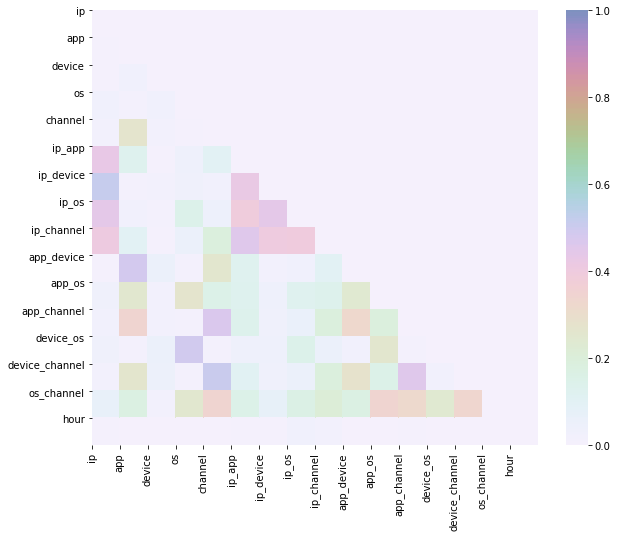

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

names = correlations.index.tolist()
f, ax = plt.subplots(figsize = (10, 8))

# method 1
# cax = ax.matshow(correlations, vmin=-1, vmax=1)  # 绘制热力图，从-1到1
# fig.colorbar(cax)  # 将matshow生成热力图设置为颜色渐变条

# method 2
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.3, as_cmap = True)
sns.heatmap(correlations, vmax=1, vmin=0, cmap=cmap, annot=False)


ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig('doc/corr/mi/corr_all.png')
plt.show()

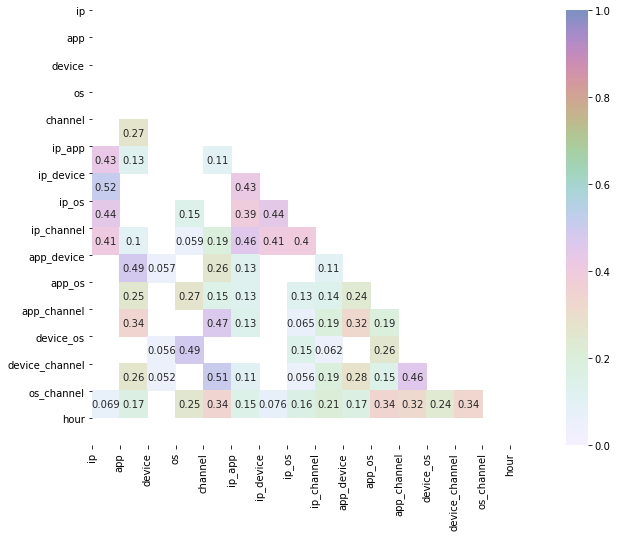

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

names = correlations.index.tolist()
f, ax = plt.subplots(figsize = (10, 8))

# method 1
# cax = ax.matshow(correlations, vmin=-1, vmax=1)  # 绘制热力图，从-1到1
# fig.colorbar(cax)  # 将matshow生成热力图设置为颜色渐变条

# method 2
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.3, as_cmap = True)
sns.heatmap(correlations, vmax=1, vmin=0, cmap=cmap, 
            annot=True, mask=correlations<0.05)


ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig('doc/corr/mi/corr_mask0.05.png')
plt.show()